In [1]:
!pip install google-play-scraper requests nltk

In [2]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd


# App ID (you can find this in the app's URL on the Play Store)
app_id = 'com.sadapay.app'  
# Scrape reviews
try:
    result = reviews_all(
        app_id,
        sleep_milliseconds=50,  
        lang='en',
        country='us',
        sort=Sort.NEWEST
    )
    print(f"Successfully scraped reviews for app: {app_id}")
except Exception as e:
    print(f"Error scraping reviews: {e}")


Successfully scraped reviews for app: com.sadapay.app


In [3]:
len(result)

37919

In [4]:
result

[{'reviewId': '13ea81ea-3f1e-4685-b05b-b6f6fc8d2996',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Good app',
  'score': 4,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '0.1.10778',
  'at': datetime.datetime(2024, 12, 16, 21, 36, 22),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '0.1.10778'},
 {'reviewId': 'a7eee946-2a48-4788-8fae-a9a82b25f337',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Very nice app keep it up good job love from UAE',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '0.1.10778',
  'at': datetime.datetime(2024, 12, 16, 21, 12, 50),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '0.1.10778'},
 {'reviewId': '1591dcec-663e-4376-8d13-676cbe757270',
  '

In [5]:
data_list = []
for i in result:
  print(i['content'])
  data_list.append(i['content'])

Good app
Very nice app keep it up good job love from UAE
good app
Sada pay app is useful for all. I am lucky to download this app
grate Job
Good
👀👀👀👀👀😍😍😍🥰🥰🥰🥰🔥🔥🔥🔥💸💸💸
Nice app
An excellent app, that facilitates all kind of transactions not only within country but abroad, its both debit cards, virtual and physical are worth value. At least I will say, this app is excellent.
Best
Both achi app ha mjy yia 3 sal sa used kar rah hon
It's been almost four days and my account has not been activated. There is so much difference and a bad platform.
excellent service and great job
Good
best bank in the world
one of the best applications I've ever used
Great experience 👍 👌 👏 🙌 😊
Good experience
Poor response no response from helpline chat
Fabolous, efecent, and fully fledged Decent Banking app that the modern world needs
Quick and seamless transactions
Good
Bad service 😔
Excellent work.
Good
Very 😊😊 very 😊 good experience
Super
Ok
Very good
👌 best
Fazool app Hy me ne use ki mery accounts me khuch p

In [6]:
import pandas as pd

df = pd.DataFrame(data_list,columns=["Reviews"] )
df.head()

Reviews
0                                           Good app
1    Very nice app keep it up good job love from UAE
2                                           good app
3  Sada pay app is useful for all. I am lucky to ...
4                                          grate Job

In [7]:
print(df.tail(20))

                                                 Reviews
37899     Easy to use and can do international payments.
37900  Awesome service, awesome chat support, super f...
37901  Too much Sada for now ( which isn't sada when ...
37902  Not a fan of banking apps in Pakistan but I mu...
37903  Been waiting for Account creation invite for a...
37904       Amazing App, best digital wallet of Pakistan
37905     Seamless onboarding and great user experience.
37906           Great UI. Account opens within minutes 😁
37907  Its been 2 years still no account activation. ...
37908                               It seems to be good.
37909                                                 🤫🥰
37910                                               Scam
37911                            Best financial services
37912                     Quick and seamless experience!
37913  Amazing custumer service and bestest payment a...
37914  I have been on waitlist for 2 years now, pathe...
37915             Can i pay to 

In [13]:
# prompt: we need to clean our data from emoji, and remove all empty rows after the removal of emoji, remove (🤫🥰 ) these too

import re

def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

# Assuming you have your DataFrame 'df' with a column named 'Reviews'

df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))
df['Reviews'] = df['Reviews'].str.replace(r'\(🤫🥰🥰\)', '', regex=True)

# Remove rows where the 'Reviews' column is empty after cleaning
df = df[df['Reviews'].str.len() > 0]

print(df.tail(20))


                                                 Reviews
37899     Easy to use and can do international payments.
37900  Awesome service, awesome chat support, super f...
37901  Too much Sada for now ( which isn't sada when ...
37902  Not a fan of banking apps in Pakistan but I mu...
37903  Been waiting for Account creation invite for a...
37904       Amazing App, best digital wallet of Pakistan
37905     Seamless onboarding and great user experience.
37906            Great UI. Account opens within minutes 
37907  Its been 2 years still no account activation. ...
37908                               It seems to be good.
37909                                                 🤫🥰
37910                                               Scam
37911                            Best financial services
37912                     Quick and seamless experience!
37913  Amazing custumer service and bestest payment a...
37914  I have been on waitlist for 2 years now, pathe...
37915             Can i pay to 

In [14]:
for i in df.Reviews:
  print(i)

Good app
Very nice app keep it up good job love from UAE
good app
Sada pay app is useful for all. I am lucky to download this app
grate Job
Good
🥰🥰🥰🥰
Nice app
An excellent app, that facilitates all kind of transactions not only within country but abroad, its both debit cards, virtual and physical are worth value. At least I will say, this app is excellent.
Best
Both achi app ha mjy yia 3 sal sa used kar rah hon
It's been almost four days and my account has not been activated. There is so much difference and a bad platform.
excellent service and great job
Good
best bank in the world
one of the best applications I've ever used
Great experience     
Good experience
Poor response no response from helpline chat
Fabolous, efecent, and fully fledged Decent Banking app that the modern world needs
Quick and seamless transactions
Good
Bad service 
Excellent work.
Good
Very  very  good experience
Super
Ok
Very good
 best
Fazool app Hy me ne use ki mery accounts me khuch payment b Hy aur ab tempor

In [15]:
import torch
print(torch.cuda.is_available())  # Should return True if a GPU is available
print(torch.cuda.device_count())  # Should return the number of GPUs available

False
0


In [16]:
from transformers import pipeline

model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0 if torch.cuda.is_available() else -1)

result = sentiment_task("Covid cases are increasing fast!")
print(result)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'negative', 'score': 0.723577082157135}]


In [17]:
print(sentiment_task("AI is not great to work on.")[0]['label'])
print(sentiment_task("AI is  great to work on.")[0]['label'])

negative
positive


In [18]:
label = []
try:
  for i in df.Reviews:
    print(i," --- " , sentiment_task(i)[0]['label'])
    label.append(sentiment_task(i)[0]['label'])

except Exception as e:
  print(e)

Good app  ---  positive
Very nice app keep it up good job love from UAE  ---  positive
good app  ---  positive
Sada pay app is useful for all. I am lucky to download this app  ---  positive
grate Job  ---  positive
Good  ---  positive
🥰🥰🥰🥰  ---  positive
Nice app  ---  positive
An excellent app, that facilitates all kind of transactions not only within country but abroad, its both debit cards, virtual and physical are worth value. At least I will say, this app is excellent.  ---  positive
Best  ---  positive
Both achi app ha mjy yia 3 sal sa used kar rah hon  ---  neutral
It's been almost four days and my account has not been activated. There is so much difference and a bad platform.  ---  negative
excellent service and great job  ---  positive
Good  ---  positive
best bank in the world  ---  positive
one of the best applications I've ever used  ---  positive
Great experience       ---  positive
Good experience  ---  positive
Poor response no response from helpline chat  ---  negative


In [19]:
len(label)

4127

In [20]:
# prompt: shrink our df to 3043 row
df = df.iloc[:1200]

In [21]:
df['label'] = label[:1200]

In [37]:
df.head()

Reviews     label
0                                               Good  positive
1  Sada pay is very Useful App I Really appreciat...  positive
2  L policies block my account just because few t...  negative
3  Mien user hun kaafi time se mgr ye auto par ho...   neutral
4  SadaPay blocked my account without any warning...  negative

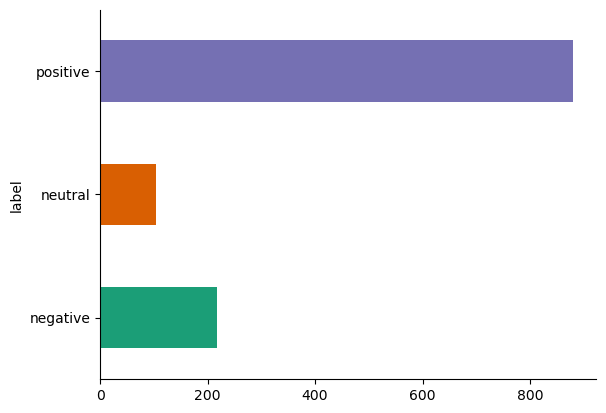

In [22]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

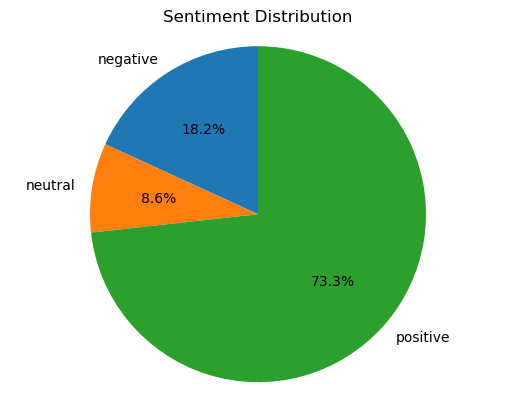

In [23]:
# prompt: create a chart in % to show positve negitive and neutral

import matplotlib.pyplot as plt

# Calculate the percentage of each label
label_counts = df.groupby('label').size()
label_percentages = (label_counts / len(df)) * 100

# Create a pie chart
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()
